### **INTRODUCTION TO DATA MINING**
#### **Assigment 1: Data exploration**
- **Universidad de Córdoba**
- **Escuela Politécnica Superior de Córdoba**
- **Computer Science Engineering Degree**
- **Mention: Computation**
- **Fourth year - First quadrimester**
- **Author:** Ventura Lucena Martínez
- **Email:** <i72lumav@uco.es>
---

#### **Data**
We are using the dataset [`weather.arff`](https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/weather.arff):

In [1]:
from scipy.io import arff
import pandas as pd

# Load '.arff' file.
data = arff.loadarff("datasets/vote.arff")
df = pd.DataFrame(data[0])

print(df)


    handicapped-infants water-project-cost-sharing  \
0                  b'n'                       b'y'   
1                  b'n'                       b'y'   
2                  b'?'                       b'y'   
3                  b'n'                       b'y'   
4                  b'y'                       b'y'   
..                  ...                        ...   
430                b'n'                       b'n'   
431                b'n'                       b'n'   
432                b'n'                       b'?'   
433                b'n'                       b'n'   
434                b'n'                       b'y'   

    adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
0                                b'n'                 b'y'            b'y'   
1                                b'n'                 b'y'            b'y'   
2                                b'y'                 b'?'            b'y'   
3                                b'y'  

Before evaluating the Decision Tree and the K-Nearest Neighbor, categorical data should be encoded and then standardized:

In [2]:
from sklearn import preprocessing

# Categorical features to encode:
features = df.columns.tolist()

enc = preprocessing.OrdinalEncoder()

# Swap unencoded columns values for encoded columns values.
df[features] = enc.fit_transform(df[features])

X_train = df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values

print(df)


     handicapped-infants  water-project-cost-sharing  \
0                    1.0                         2.0   
1                    1.0                         2.0   
2                    0.0                         2.0   
3                    1.0                         2.0   
4                    2.0                         2.0   
..                   ...                         ...   
430                  1.0                         1.0   
431                  1.0                         1.0   
432                  1.0                         0.0   
433                  1.0                         1.0   
434                  1.0                         2.0   

     adoption-of-the-budget-resolution  physician-fee-freeze  el-salvador-aid  \
0                                  1.0                   2.0              2.0   
1                                  1.0                   2.0              2.0   
2                                  2.0                   0.0              2.0   
3  

#### **Evaluation of the Decision Tree**

Decision Tree:
	Train score = [0.97241379 0.96551724 0.93793103]


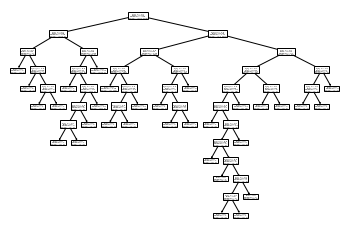

In [3]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate training score by cross-validation.
print(f'Decision Tree:')
print(f'\tTrain score = {cross_val_score(clf, X_train, y_train, cv=3)}')

# Plot the tree.
#	For better plotting try graphviz: https://scikit-learn.org/stable/modules/tree.html
tree.plot_tree(clf)
plt.show()


#### **Evaluation of K-Nearest Neighbor**

In [4]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Evaluate training score by cross-validation.
print(f'K-Nearest Neighbors:')
print(f'\tTrain score = {cross_val_score(neigh, X_train, y_train, cv=3)}')


K-Nearest Neighbors:
	Train score = [0.92413793 0.88965517 0.90344828]


#### **PCA**

In [5]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

# Percentage of variance explained by each of the selected components.
print(f'Explained variance ratio = {pca.explained_variance_ratio_}')

fig = px.scatter(principalComponents, x=0, y=1, color=df['Class'])
fig.show()


Explained variance ratio = [0.32262492 0.14065724]


#### **Evaluation of the Decision Tree and K-Nearest Neighbor with random samples**

The following function provides a stratified sample according to a percentage of the population:

In [6]:
from sklearn.utils.random import sample_without_replacement


def stratified_sample_without_replacement(df, percentage):
    """
    Get a % samples of a population.

    Parameters
    ----------
    data: nparray
        Original standardized data.
    percentage:
        Percentage of desired random samples.

    Returns
    -------
    n_population * percentage random X_train, y_train and samples.
    """

    n_population = len(df)

    samples = sample_without_replacement(
        n_population=n_population, n_samples=n_population * percentage)

    X_train = df.iloc[samples, :-1].values
    y_train = df.iloc[samples, -1].values

    print(f'{percentage * 100}% of samples without replacement = {samples}\n')
    print(df.iloc[samples, :])

	# Decision Tree.
    clf.fit(X_train, y_train)

    # Evaluate training score by cross-validation.
    print(f'\nDecision Tree [{percentage * 100}%]:')
    print(
        f'\tTrain score = {cross_val_score(clf, X_train, y_train, cv=3)}')

    # Plot the tree.
    tree.plot_tree(clf)
    plt.show()

	# K-Nearest Neighbor.
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)

    # Evaluate training score by cross-validation.
    print(f'K-Nearest Neighbor [{percentage * 100}%]:')
    print(
        f'\tTrain score = {cross_val_score(neigh, X_train, y_train, cv=3)}')


**Decision Tree and K-Nearest Neighbor with stratified random sample \[10%\]**

10.0% of samples without replacement = [402  39 206 433 261 434 283 382 411 312 307 211 412 404   7   4 234 105
 277 387   6 208 303 346  85 338 169  18  92 251  38 175 222 341  83 272
 331 248 246 166  25 315  31]

     handicapped-infants  water-project-cost-sharing  \
402                  0.0                         1.0   
39                   2.0                         1.0   
206                  1.0                         1.0   
433                  1.0                         1.0   
261                  2.0                         1.0   
434                  1.0                         2.0   
283                  1.0                         1.0   
382                  2.0                         2.0   
411                  2.0                         1.0   
312                  2.0                         2.0   
307                  2.0                         1.0   
211                  1.0                         2.0   
412                  1.0                         1.0   


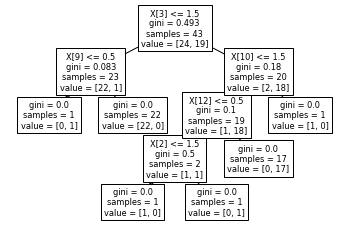

K-Nearest Neighbor [10.0%]:
	Train score = [0.93333333 0.85714286 0.85714286]


In [7]:
stratified_sample_without_replacement(df, 0.1)

**Decision Tree and K-Nearest Neighbor with stratified random sample \[50%\]**

50.0% of samples without replacement = [320 225  79 257 144 328 406 299 270 381 230 273 333 389 196 218 402 294
 364 291 178 100 104 167 391 241 132 357 204 289 322 193 110 231 377 169
  42  34 423  78 125 371 137 305 131  24 298 276 160 251 222 256  57  58
 337 142 116 227 238 359 245 428 345 128 106 246 268 410 115  41 417 286
 344 393 430 288 214 155  76 130 326 275  45 188 252 114 284 307  19 274
 421 124 139 185  33 392 383 317  63 175 123 315 105 282  64   8 168 254
 135 427  90 211 179 302 348 311 342  72 367 313 192 213 203 292 277 363
  95 285  26 411 375  73 119 398 414 373  48  99 239  46 374 394 216 366
   6  43 296 434  71 182 283 432 271   7  92 272 143  91 174  36   0 176
 157 433 362 118  15 148  40  89  31 136 340  61 129 181  82 112 264 407
 153   1 404 385  16 408 208 420  50 161 240 113  47 350  86 183 390 147
 220 355  44  56 237  53  37 356 109 146  83 327 397  35 159 232  66 387
 140]

     handicapped-infants  water-project-cost-sharing  \
320                  1

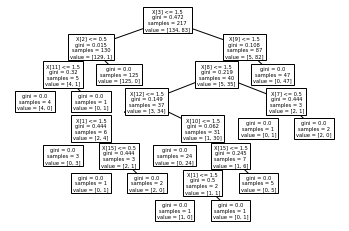

K-Nearest Neighbor [50.0%]:
	Train score = [0.94520548 0.93055556 0.875     ]


In [8]:
stratified_sample_without_replacement(df, 0.5)

#### **Imputation of missing values**

In [10]:
# Reload '.arff' file.
data = arff.loadarff("datasets/vote.arff")
df = pd.DataFrame(data[0])

# Categorical features to encode:
features = df.columns.tolist()

enc = preprocessing.OrdinalEncoder()

# Swap unencoded columns values for encoded columns values.
df[features] = enc.fit_transform(df[features])

X_train = df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values

In [11]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit_transform(X_train)

print('Impute missing values by mean strategy:\n')
print(X_train)

Impute missing values by mean strategy:

[[1. 2. 1. ... 2. 1. 2.]
 [1. 2. 1. ... 2. 1. 0.]
 [0. 2. 2. ... 2. 1. 1.]
 ...
 [1. 0. 1. ... 2. 1. 2.]
 [1. 1. 1. ... 2. 1. 2.]
 [1. 2. 1. ... 2. 0. 1.]]


In [12]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit_transform(X_train)

print('Impute missing values by most_frequent strategy:\n')
print(X_train)

Impute missing values by most_frequent strategy:

[[1. 2. 1. ... 2. 1. 2.]
 [1. 2. 1. ... 2. 1. 0.]
 [0. 2. 2. ... 2. 1. 1.]
 ...
 [1. 0. 1. ... 2. 1. 2.]
 [1. 1. 1. ... 2. 1. 2.]
 [1. 2. 1. ... 2. 0. 1.]]
